In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]

In [84]:
img=cv2.imread("coin_counting_1.png",cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

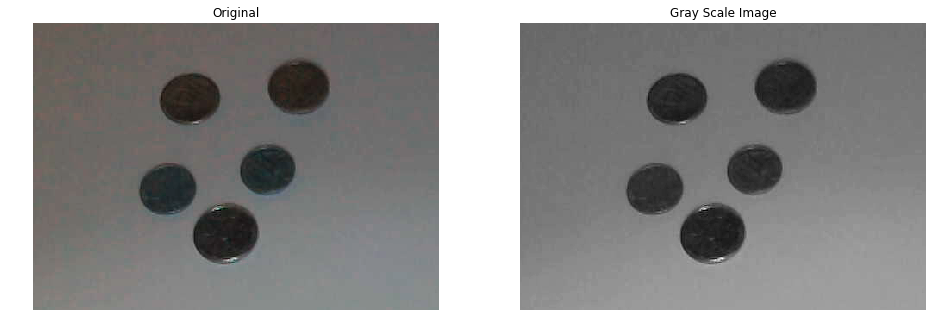

In [85]:
plt.subplot(1,2,1),plt.imshow(img), plt.title("Original")
plt.axis('off')
plt.subplot(1,2,2),plt.imshow(gray, cmap='gray'), plt.title("Gray Scale Image")
plt.axis('off')
plt.show()

### Gaussian Blurring and Thresholding

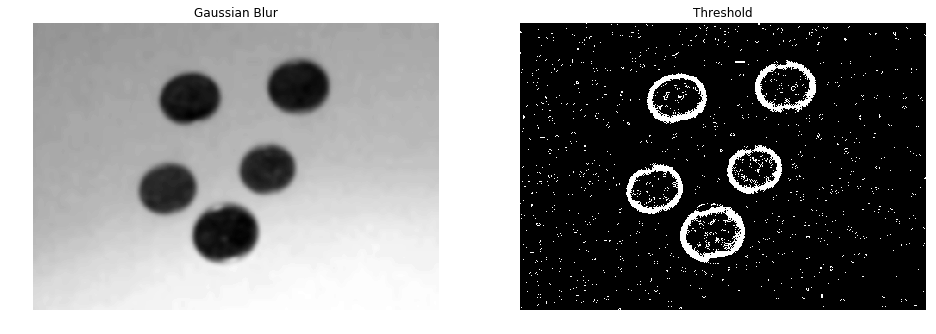

In [89]:
gray_blur = cv2.GaussianBlur(gray, (15, 15), 0) # Values of (sigma_x,sigma_y)  i.e (15, 15) in our case needs 
                                                # to changed accordingly to remove background noise 
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 7, 1) # Value of block size  i.e 3 in our case needs 
                                 # to changed accordingly to remove background noise 

plt.subplot(1,2,1),plt.imshow(gray_blur, cmap='gray'), plt.title("Gaussian Blur")
plt.axis('off')
plt.subplot(1,2,2),plt.imshow(thresh, cmap='gray'), plt.title("Threshold")
plt.axis('off')
plt.show()

### Morphological Operators

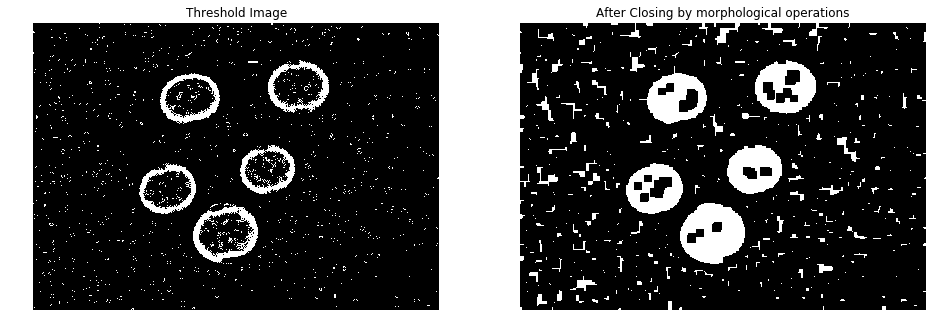

In [87]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=4)  # Value of iterations i.e 4 in our case needs 
                                                                 # to changed accordingly to avoid complete black background

plt.subplot(1,2,1),plt.imshow(thresh, cmap='gray'), plt.title("Threshold Image")
plt.axis('off')
plt.subplot(1,2,2),plt.imshow(closing, cmap='gray'), plt.title("After Closing by morphological operations")
plt.axis('off')
plt.show()

### Contour detection and filtering

Number of coins: 5


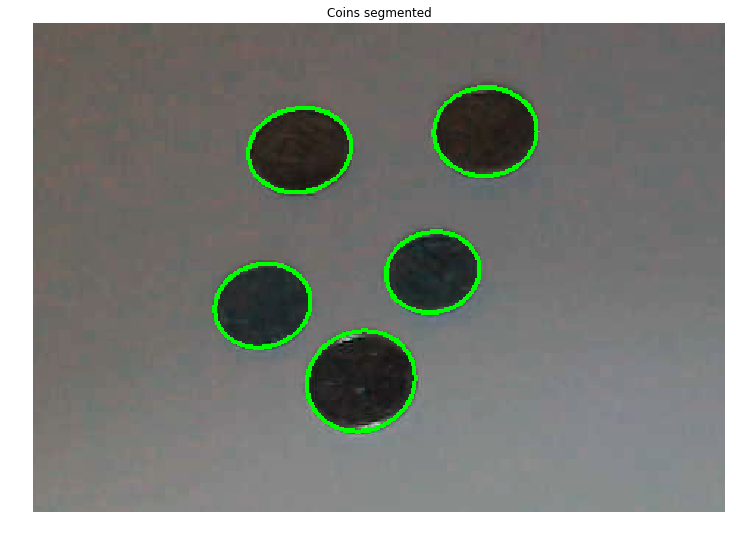

In [88]:
cont_img = closing.copy()
_ , contours, _ = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,
                                        cv2.CHAIN_APPROX_SIMPLE)
count = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 4000: # Avoiding contours of areas lesser and larger than expected area of coins.
        continue

    if len(cnt) < 5:
        continue

    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img, ellipse, (0,255,0), 2)
    count += 1

print('Number of coins:', count)
plt.imshow(img), plt.title("Coins segmented")
plt.axis('off'), plt.show();

Though simple in implementation there are many parameters which needs to be tuned to get desirable result. And also has limitations when objects are touching or overlapping.

Link to tutorial: http://blog.christianperone.com/2014/06/simple-and-effective-coin-segmentation-using-python-and-opencv/